# Machine Learning e Data Science com Python

### Importando as bibliotecas

In [1]:
#pip install plotly --upgrade

In [2]:
#pip install seaborn

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Base de dados de Crédito

Base de credito https://www.kaggle.com/laotse/credit-risk-dataset

In [4]:
#import kagglehub

# Download latest version
#path = kagglehub.dataset_download("laotse/credit-risk-dataset")

#print("Path to dataset files:", path)

### Explorando os dados

In [5]:
path_rsk = r"C:\Users\elias\Documents\CURSOS\Udemy\Machine Learning e Data Science com Python de A a Z\Bases de dados\credit_data.csv"

In [6]:
base_credit = pd.read_csv(path_rsk)

In [7]:
base_credit.head(3)

#income     = Valor do salario
#loan       = valor da dívida 
#default    = 0 false 1 true


clientid        income        age         loan  default
0         1  66155.925095  59.017015  8106.532131        0
1         2  34415.153966  48.117153  6564.745018        0
2         3  57317.170063  63.108049  8020.953296        0

In [8]:
print(base_credit.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   clientid  2000 non-null   int64  
 1   income    2000 non-null   float64
 2   age       1997 non-null   float64
 3   loan      2000 non-null   float64
 4   default   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.3 KB
None


In [9]:
#Renomeando os campos

base_credit = base_credit.rename(columns={'clienteid':'ClienteId',"income" : "Renda",'age':'Idade' ,"loan":"Divida", 'default':  'Quitado'})

In [10]:
## resumo estatístico dos dados
base_credit.describe()

clientid         Renda        Idade        Divida      Quitado
count  2000.000000   2000.000000  1997.000000   2000.000000  2000.000000
mean   1000.500000  45331.600018    40.807559   4444.369695     0.141500
std     577.494589  14326.327119    13.624469   3045.410024     0.348624
min       1.000000  20014.489470   -52.423280      1.377630     0.000000
25%     500.750000  32796.459717    28.990415   1939.708847     0.000000
50%    1000.500000  45789.117313    41.317159   3974.719419     0.000000
75%    1500.250000  57791.281668    52.587040   6432.410625     0.000000
max    2000.000000  69995.685578    63.971796  13766.051239     1.000000

In [11]:
base_credit[base_credit['Renda'] >= 69995]

clientid         Renda      Idade       Divida  Quitado
422       423  69995.685578  52.719673  2084.370861        0

In [12]:
np.unique(base_credit['Quitado'], return_counts=True)


(array([0, 1], dtype=int64), array([1717,  283], dtype=int64))

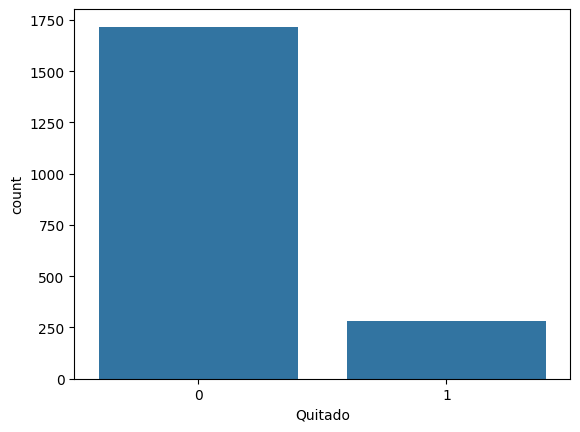

In [13]:
#Criando um grafico com os pagadores

sns.countplot(x=base_credit['Quitado']);

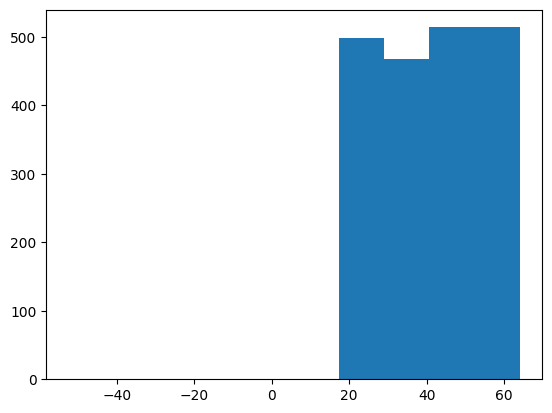

In [14]:
#Grafico histograma

plt.hist(x = base_credit['Idade']);

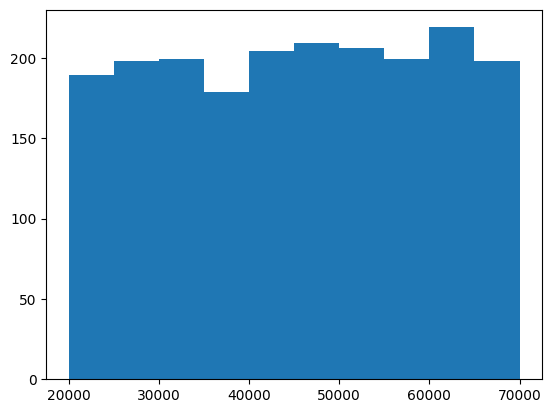

In [15]:
plt.hist(x = base_credit['Renda']);

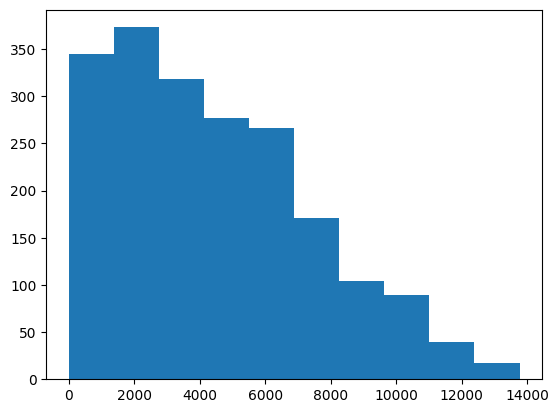

In [16]:
plt.hist(x=base_credit['Divida']);

In [17]:
grafico = px.scatter_matrix(base_credit, dimensions=['Idade', 'Renda', 'Divida'], color='Quitado')
grafico


## Tratando valores inconsistentes

In [18]:
base_credit.loc[base_credit['Idade']<0]

clientid         Renda      Idade       Divida  Quitado
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [19]:
base_credit[base_credit['Idade']<0]

clientid         Renda      Idade       Divida  Quitado
15        16  50501.726689 -28.218361  3977.287432        0
21        22  32197.620701 -52.423280  4244.057136        0
26        27  63287.038908 -36.496976  9595.286289        0

In [20]:
#deletando uma coluna

base_cred2 = base_credit.drop(['Idade'],axis=1)
base_cred2.head()

clientid         Renda       Divida  Quitado
0         1  66155.925095  8106.532131        0
1         2  34415.153966  6564.745018        0
2         3  57317.170063  8020.953296        0
3         4  42709.534201  6103.642260        0
4         5  66952.688845  8770.099235        1

In [21]:
## apaga filtrando

base_cred3 = base_credit.drop(base_credit[base_credit['Idade']<0].index)

base_credit[base_credit['Idade']<0].index

Index([15, 21, 26], dtype='int64')

In [22]:
## Ajustar com a media do valor das idades corretas

base_credit[base_credit['Idade']>0]['Idade'].mean()

40.92770044906149

In [23]:
base_credit.loc[base_credit['Idade']< 0, 'Idade'] = 40.92

In [24]:
base_credit[base_credit['Idade']<0]

Empty DataFrame
Columns: [clientid, Renda, Idade, Divida, Quitado]
Index: []

In [25]:
base_credit[base_credit.index.isin([15,21,26])]

clientid         Renda  Idade       Divida  Quitado
15        16  50501.726689  40.92  3977.287432        0
21        22  32197.620701  40.92  4244.057136        0
26        27  63287.038908  40.92  9595.286289        0

## Tratando valores Nulos

In [26]:
#Comando pandas
base_credit.isnull()

clientid  Renda  Idade  Divida  Quitado
0        False  False  False   False    False
1        False  False  False   False    False
2        False  False  False   False    False
3        False  False  False   False    False
4        False  False  False   False    False
...        ...    ...    ...     ...      ...
1995     False  False  False   False    False
1996     False  False  False   False    False
1997     False  False  False   False    False
1998     False  False  False   False    False
1999     False  False  False   False    False

[2000 rows x 5 columns]

In [27]:
#Dessa forma consigo ver quantos valores por linhas estao em branco
base_credit.isnull().sum()

clientid    0
Renda       0
Idade       3
Divida      0
Quitado     0
dtype: int64

In [28]:
#tipo de filtro
base_credit[base_credit['Idade'].isnull()]

clientid         Renda  Idade       Divida  Quitado
28        29  59417.805406    NaN  2082.625938        0
30        31  48528.852796    NaN  6155.784670        0
31        32  23526.302555    NaN  2862.010139        0

In [29]:
#filtro pelo pandas
base_credit.loc[pd.isnull(base_credit['Idade'])]

clientid         Renda  Idade       Divida  Quitado
28        29  59417.805406    NaN  2082.625938        0
30        31  48528.852796    NaN  6155.784670        0
31        32  23526.302555    NaN  2862.010139        0

In [30]:
#incluindo a media de idade pelo pandas
# o implace altera diretamente o db
# fillna preenche as informações vazias

base_credit['Idade'].fillna(base_credit['Idade'].mean(),inplace=True)

C:\Users\elias\AppData\Local\Temp\ipykernel_11776\1028257889.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [31]:
base_credit[base_credit['clientid'].isin([29,31,32])]


clientid         Renda      Idade       Divida  Quitado
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

In [32]:
base_credit.loc[base_credit['clientid'].isin([29,31,32])]

clientid         Renda      Idade       Divida  Quitado
28        29  59417.805406  40.927689  2082.625938        0
30        31  48528.852796  40.927689  6155.784670        0
31        32  23526.302555  40.927689  2862.010139        0

## Divisão entre previsores e classe
Os previsores devem estar armazenados em uma unica variavel chamada X
    Os previsores sao renda, idade e divida
As Classes devem ser armazenadas em outra variavel chamada Y
    A Classe é o atributo da dívida se pago ou nao

In [33]:
#Variavel X
"""A função .iloc[] do pandas é usada para acessar linhas e colunas 
de um DataFrame com base em posições numéricas, 
e não pelos rótulos (como o .loc[]).

iloc[0] retorna a primeira linha.
iloc[2, 1] acessa o valor da linha 3, coluna 2 (contando a partir de 0).

Funciona como um “índice por número”, ideal quando você quer 
acessar posições específicas sem se preocupar com os nomes 
dos índices ou colunas.
: traz tudo de acordo com a posição
1º = linhas
2º = colunas
o comando values transforma em matriz array do numpy
interpretar
"""

x_credit = base_credit.iloc[:,1:4].values

In [34]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [35]:
type(x_credit)

numpy.ndarray

In [36]:
y_credit = base_credit.iloc[:,4].values
y_credit

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [37]:
type(y_credit)

numpy.ndarray

## Escalonamento dos Dados

In [38]:
x_credit

array([[6.61559251e+04, 5.90170151e+01, 8.10653213e+03],
       [3.44151540e+04, 4.81171531e+01, 6.56474502e+03],
       [5.73171701e+04, 6.31080495e+01, 8.02095330e+03],
       ...,
       [4.43114493e+04, 2.80171669e+01, 5.52278669e+03],
       [4.37560566e+04, 6.39717958e+01, 1.62272260e+03],
       [6.94365796e+04, 5.61526170e+01, 7.37883360e+03]])

In [51]:
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(20014.4894700497, 18.055188510566897, 1.37762959325451)

In [52]:
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(69995.6855783239, 63.971795841120205, 13766.0512393337)

## Normalizando os dados
Padronização é melhor qdo temos outliers dentro da base



In [ ]:
#Biblioteca padrão para aprendizagem de maquina no python 
import sklearn

In [60]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# Primeiro crio uma variavel como skleanr preprocessing 
# e depois atrubuo o valor do meu array
scaler_credit = StandardScaler()
x_credit = scaler_credit.fit_transform(x_credit)

In [64]:
#Valores Minimos padronizados
x_credit[:,0].min(), x_credit[:,1].min(), x_credit[:,2].min()

(-1.7676158019964077, -1.7264145408889917, -1.4592791099462408)

In [65]:
#Valores Maximos padronizados
x_credit[:,0].max(), x_credit[:,1].max(), x_credit[:,2].max()

(1.7220222385319197, 1.7393673928651967, 3.0616609141708273)

## Base de dados do censo

https://archive.ics.uci.edu/ml/datasets/adult

In [2]:
import pandas as pd

In [3]:
base_census = pd.read_csv(r"C:\Users\elias\Documents\CURSOS\Udemy\Machine Learning e Data Science com Python de A a Z\Bases de dados\census.csv")

In [6]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [5]:
base_census.head()

age          workclass  final-weight   education  education-num  \
0   39          State-gov         77516   Bachelors             13   
1   50   Self-emp-not-inc         83311   Bachelors             13   
2   38            Private        215646     HS-grad              9   
3   53            Private        234721        11th              7   
4   28            Private        338409   Bachelors             13   

        marital-status          occupation    relationship    race      sex  \
0        Never-married        Adm-clerical   Not-in-family   White     Male   
1   Married-civ-spouse     Exec-managerial         Husband   White     Male   
2             Divorced   Handlers-cleaners   Not-in-family   White     Male   
3   Married-civ-spouse   Handlers-cleaners         Husband   Black     Male   
4   Married-civ-spouse      Prof-specialty            Wife   Black   Female   

   capital-gain  capital-loos  hour-per-week  native-country  income  
0          2174             0             40   United-States   <=50K  
1             0             0             13   United-States   <=50K  
2             0             0             40   United-States   <=50K  
3             0             0             40   United-States   <=50K  
4             0             0             40            Cuba   <=50K

In [11]:
base_census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   final-weight    32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loos    32561 non-null  int64 
 12  hour-per-week   32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [14]:
base_census.describe()

age  final-weight  education-num  capital-gain  capital-loos  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.581647  1.897784e+05      10.080679   1077.648844     87.303830   
std       13.640433  1.055500e+05       2.572720   7385.292085    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       hour-per-week  
count   32561.000000  
mean       40.437456  
std        12.347429  
min         1.000000  
25%        40.000000  
50%        40.000000  
75%        45.000000  
max        99.000000

In [ ]:
## Estou vendo se ha dados nulos na base
## qdo é 0 n tem pq soma os dados qdo nulos

base_census.isnull().sum()

age               0
workclass         0
final-weight      0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loos      0
hour-per-week     0
native-country    0
income            0
dtype: int64

## Visualização dos Dados

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [ ]:
#Retorna uma tupla com os valores nulos
np.unique(base_census['income'], return_counts=True)

(array([' <=50K', ' >50K'], dtype=object), array([24720,  7841], dtype=int64))

<Axes: xlabel='income', ylabel='count'>

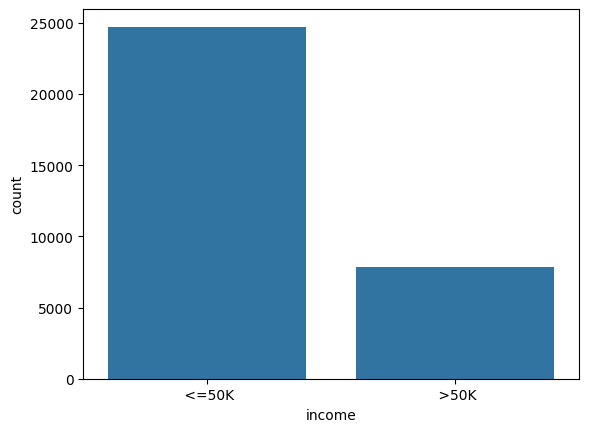

In [24]:
sns.countplot(x=base_census['income'])

(array([5570., 5890., 6048., 6163., 3967., 2591., 1595.,  496.,  174.,
          67.]),
 array([17. , 24.3, 31.6, 38.9, 46.2, 53.5, 60.8, 68.1, 75.4, 82.7, 90. ]),
 <BarContainer object of 10 artists>)

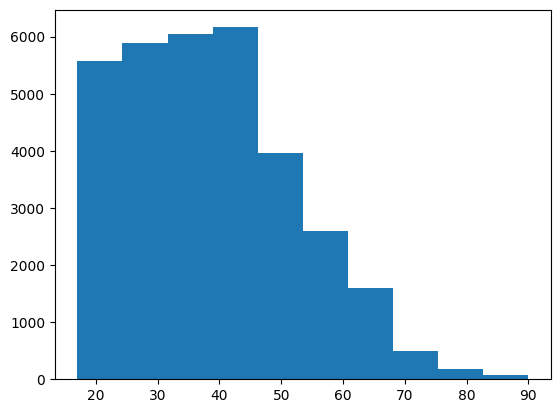

In [34]:
plt.hist(x=base_census['age'])

(array([  219.,   333.,  1160.,   933.,  1608., 10501.,  8673.,  1067.,
         7078.,   989.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <BarContainer object of 10 artists>)

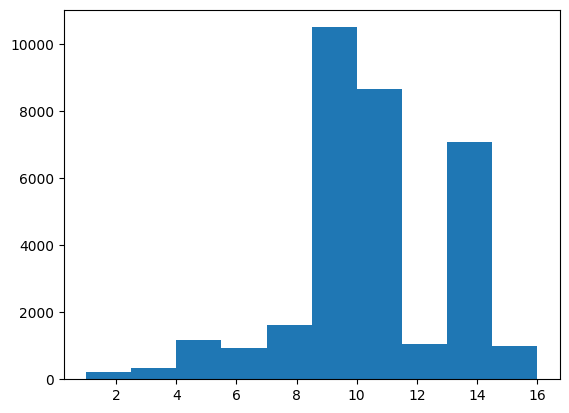

In [35]:
plt.hist(x=base_census['education-num'])

(array([  736.,  2192.,  2317., 17735.,  3119.,  3877.,  1796.,   448.,
          202.,   139.]),
 array([ 1. , 10.8, 20.6, 30.4, 40.2, 50. , 59.8, 69.6, 79.4, 89.2, 99. ]),
 <BarContainer object of 10 artists>)

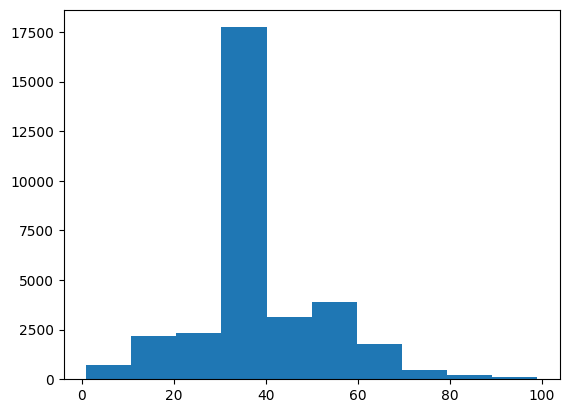

In [36]:
plt.hist(x=base_census['hour-per-week'])

In [22]:
np.unique(base_census['education'],return_counts=True)

(array([' 10th', ' 11th', ' 12th', ' 1st-4th', ' 5th-6th', ' 7th-8th',
        ' 9th', ' Assoc-acdm', ' Assoc-voc', ' Bachelors', ' Doctorate',
        ' HS-grad', ' Masters', ' Preschool', ' Prof-school',
        ' Some-college'], dtype=object),
 array([  933,  1175,   433,   168,   333,   646,   514,  1067,  1382,
         5355,   413, 10501,  1723,    51,   576,  7291], dtype=int64))

In [38]:
grafico = px.treemap(base_census, path=['workclass','age'])
grafico.show()

In [49]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [51]:
grafico = px.treemap(base_census, path=['occupation','sex'])
grafico.show()

In [53]:
grafico = px.parallel_categories(base_census, dimensions=['occupation', 'relationship'])
grafico.show()

In [55]:
grafico = px.parallel_categories(base_census, dimensions=['workclass', 'occupation', 'income'])
grafico.show()

In [59]:
grafico = px.parallel_categories(base_census, dimensions=['income','sex','education'])
grafico.show()

## Divisão entre previsores de classe
Por padrao os previsores sao o X
Classe é o Y

In [2]:
base_census = pd.read_csv(r"C:\Users\elias\Documents\CURSOS\Udemy\Machine Learning e Data Science com Python de A a Z\Bases de dados\census.csv")

In [3]:
## .iloc pra selecionar
## : tds as linhas 
## 0:14 da 1º ate a 14º coluna

X_census = base_census.iloc[:,0:14].values

In [5]:
base_census.columns

Index(['age', 'workclass', 'final-weight', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loos', 'hour-per-week', 'native-country',
       'income'],
      dtype='object')

In [8]:
Y_census = base_census.iloc[:, 14].values

In [10]:
Y_census[0]

' <=50K'

### Tratando os atributos categoricos
São divididos em 2
LabelEncoder
OneHotEncoder

#### Label encoder

Converter uma variavel categorica em númerica para podermos trabalhar com machine learning
A base trabalhada n é um dataframe, é um array do numpy para trabalhar com machine learning
É como se o fit_transform criasse uma chave numerica pra uma variavel categorica do tipo texto

In [11]:
from sklearn.preprocessing import LabelEncoder

In [13]:
label_encoder_Test = LabelEncoder()
teste = label_encoder_Test.fit_transform(X_census[:,1])

Vamos converter tds as variaveis categoricas de texto em cod númerico

In [20]:
label_encoder_workclass = LabelEncoder()
label_encoder_education = LabelEncoder()
label_encoder_marital = LabelEncoder()
label_encoder_occupation = LabelEncoder()
label_encoder_relationship = LabelEncoder()
label_encoder_race = LabelEncoder()
label_encoder_sex = LabelEncoder()
label_encoder_country = LabelEncoder()


Alterando as colunas para cod

In [21]:
X_census[:,1] = label_encoder_workclass.fit_transform(X_census[:,1])
X_census[:,3] = label_encoder_education.fit_transform(X_census[:,3])
X_census[:,5] = label_encoder_marital.fit_transform(X_census[:,5])
X_census[:,6] = label_encoder_occupation.fit_transform(X_census[:,6])
X_census[:,7] = label_encoder_relationship.fit_transform(X_census[:,7])
X_census[:,8] = label_encoder_race.fit_transform(X_census[:,8])
X_census[:,9] = label_encoder_sex.fit_transform(X_census[:,9])
X_census[:,13] = label_encoder_country.fit_transform(X_census[:,13])


In [28]:
##Tds as variaveis convertidas pra numeric dentro do array
X_census

array([[39, 7, 77516, ..., 0, 40, 39],
       [50, 6, 83311, ..., 0, 13, 39],
       [38, 4, 215646, ..., 0, 40, 39],
       ...,
       [58, 4, 151910, ..., 0, 40, 39],
       [22, 4, 201490, ..., 0, 20, 39],
       [52, 5, 287927, ..., 0, 40, 39]], dtype=object)